# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other columns.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 1 
Read the dataset given in file named 'bigcity.csv'.

In [ ]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
from google.colab import files

uploaded = files.upload()

Saving bigcity.csv to bigcity (2).csv


In [14]:
# Read the file and see a few rows
import pandas as pd

df = pd.read_csv("C:\\Users\\RKRIS\\Downloads\\bigcity+(3).csv")


In [15]:
df.head(10)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75
5,6,37,63
6,7,29,50
7,8,23,48
8,9,30,111
9,10,2,50


# Question 2 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can use shape function to get the size of the dataframe


In [29]:
# get the shape

#Reshaping to make it compatible with linear regression model

from scipy.stats import zscore

df.shape

df_shape = df.apply(zscore)
df_shape = pd.DataFrame(df_shape, columns=df.columns)
U = df_shape[['u']]
X = df_shape[['x']]

In [30]:
df.drop(df.columns[0],axis=1,inplace=True)

# Question 3 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [27]:
U = pd.DataFrame(df.u.isna())
x = pd.DataFrame(df.x.isna())

In [28]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u can be a good predictor of variable x

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(U, X, test_size=0.20, random_state=1)

type(X_train)

pandas.core.frame.DataFrame

# Question 5 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [ ]:
#Reference link - http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Fit the linear regression model

In [33]:
#Apply lr model 

# invoke the LinearRegression function 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

for idx, col_name in enumerate(X_train.columns):
    print("coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))    

intercept = lr.intercept_[0]
print("intercept is {}".format(intercept))


The coefficient for u is 0.9831983927040457
The intercept is 0.01240497188752547


In [ ]:
# Let us explore the coefficients for each of the independent attributes


# Question 6 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

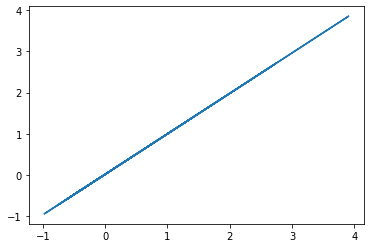

In [36]:
from matplotlib import pyplot as plt
y = lr.coef_[0][0] * X_train + lr.intercept_[0]
plt.plot(X_train,y)

# Question 7 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_Predict = lr.predict(X_test)

print("The Root Mean Sq Error is {} and R^2 error is {}".format(mean_squared_error(y_test,y_Predict),r2_score(y_test,y_Predict)))

The Root Mean Sq Error is 0.03682752839849216 and R^2 error is 0.918192256039698


## Question 8 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [ ]:
#Train accuracy

In [ ]:
#Test accuracy 

In [42]:
print("Training Score:",lr.score(X_train,y_train))
print("Testing Score:",lr.score(X_test, y_test))

Training Score: 0.9682175540860047
Testing Score: 0.9181922560396981


## Supervised Learning - Building a Student Performance Prediction System  

# Question 1 
#### The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Question 1 - Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
from google.colab import files

uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [6]:
# Read dataset using pandas and print few rows
students = pd.read_csv('students-data.csv', sep=';')
students.shape

(395, 33)

In [ ]:
#print the columns in the dataframe

## Question 3 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [ ]:
students.columns
students.index.name = 'number'
students.isnull().any()

## Transform Data

## Question 4

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [ ]:
students.select_dtypes(include='object').head()

In [ ]:
students.select_dtypes(exclude='object').head()

## Question 5 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [ ]:
students.select_dtypes(exclude='object').var()

In [ ]:
students.corr()[['G1', 'G2', 'G3']]

In [ ]:
columns = students.select_dtypes(exclude='object')
for ii in columns:
    if (students[ii].var() < 1):
        students.drop(columns=ii, axis=1, inplace=True)
students.select_dtypes(exclude='object').var()

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 6 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [7]:
students.select_dtypes(include='object').head(5)
columns = students.select_dtypes(include='object').columns
columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [ ]:
labelEncoder = preprocessing.LabelEncoder()

In [ ]:
for ii in columns:
    students[ii] = labelEncoder.fit_transform(students[ii])
students.head(5)

## Question 7 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [ ]:
grades = ['G1', 'G2', 'G3']
for ii in grades:
    students[ii] = np.where(students[ii] < 10, 0, 1)
students.head(5)

## Question 8 - Apply the models.
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [9]:
# Target values are G3

# Feature set is remaining features

X = students.drop('G3', axis=1)
y = students['G3']

## Visualization

## Question 9

*Plot G2 and G3 and give your understanding on relation between both variables.*

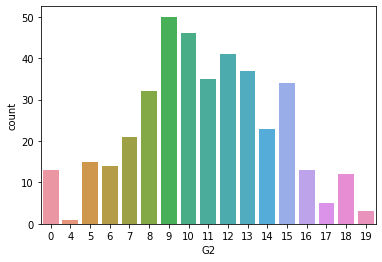

In [10]:
import seaborn as sns

sns.countplot(students.G2)


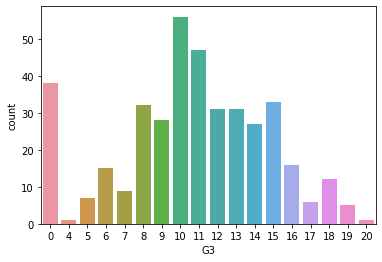

In [11]:
sns.countplot(students.G3)



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 10

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [13]:
students.school.unique()

array(['GP', 'MS'], dtype=object)

Number of students in GM School:  0
Number of students in MS School:  0


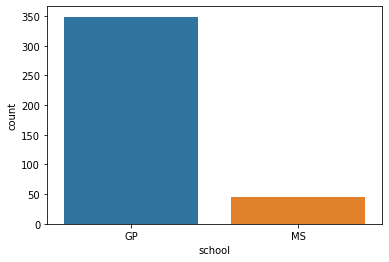

In [14]:
print('Number of students in GM School: ', len(students[students['school'] == 0]))
print('Number of students in MS School: ', len(students[students['school'] == 1]))
sns.countplot(students['school'])

## Question 11 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [15]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300/len(X), random_state=1)
print('Number of train records', len(X_train))
print('Number of train records', len(X_test))

Number of train records 300
Number of train records 95


## Question 12 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

print('Accuracy training : ', lr.score(X_train, y_train))
print('Accuracy testing : ', lr.score(X_test, y_test))

ValueError: could not convert string to float: 'yes'

Naive Bayes Classifier

K-neighbours Classifier

In [22]:
lr = KNeighborsClassifier()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

print('Accuracy training : ', lr.score(X_train, y_train))
print('Accuracy testing : ', lr.score(X_test, y_test))

ValueError: could not convert string to float: 'GP'